# Generate Synthetic Data for Tests

In [40]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datadrivenquadrature as ddq

In [41]:
def generate_spectra(x_idx, y_idx, s=1000):
    spectra = []
    x = np.arange(0, 12, 1./s)
    for val in x:
        if val < 8:
            spectra.append((-x_idx / 16.) * (val) * (val - 8))
        else:
            spectra.append((-y_idx / 4.) * (val - 8) * (val - 12))
    return spectra

def compute_exact_integral(x_idx, y_idx):
    return 16./3 * x_idx + 8./3 * y_idx

In [42]:
n = 10 # size of square block of data
s = 1000 # number of points on the integration axis
x_integrated = []
x_spectra = []

for y_idx in range(n):
    x_integrated_row = []
    x_spectra_row = []
    for x_idx in range(n):
        x_integrated_row.append(compute_exact_integral(x_idx + 1, y_idx + 1))
        x_spectra_row.append(generate_spectra(x_idx + 1, y_idx + 1, s))
    x_integrated.append(x_integrated_row)
    x_spectra.append(x_spectra_row)

x_range = np.arange(0, 12, 1./s)

x = xr.DataArray(x_spectra,
    dims=("x_idx", "y_idx", "integration_axis"), 
    coords={"x_idx": list(np.arange(1, n + 1, 1)),
             "y_idx": list(np.arange(1, n + 1, 1)),
             "integration_axis": x_range}
)
y = xr.DataArray(x_integrated,
    dims=("x_idx", "y_idx"), 
    coords={"x_idx": list(np.arange(1, n + 1, 1)),
             "y_idx": list(np.arange(1, n + 1, 1))}
)

[0.         0.00049994 0.00099975 ... 0.00299775 0.001999   0.00099975]


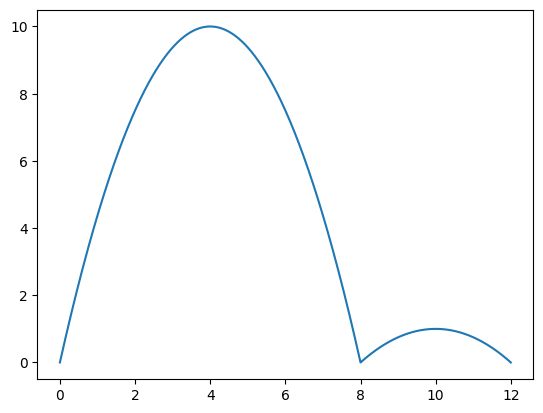

In [43]:
print(x[0][0].values)
plt.plot(x_range, x[0][9].values)

In [44]:
y_ref = y.values.flatten()
print(y_ref.shape)

(100,)


In [45]:
def user_cost_fnc(y, y_hat):
    cost = sum(y - y_hat)
    return cost

def map_func(x, point_set, x_sup=None):
    point_idxs = [list(point.values())[0] for point in point_set]
    points = np.array(x[:,:,point_idxs].values).reshape((n*n, 2))
    return points

params = {}
integration_list = ['integration_axis']
params['integration_list'] = integration_list
params['n_points'] = 2
params['epochs'] = 100
params['success'] = 10
params['block_size'] = 10

history = ddq.optimize(x, y_ref, user_cost_fnc, map_func, params, x_sup=None)

5657.813310680996 81.882610515261 61.411957886183934
EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5


c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
EPOCH: 10
EPOCH: 11
EPOCH: 12
EPOCH: 13
EPOCH: 14
EPOCH: 15
EPOCH: 16
EPOCH: 17
EPOCH: 18
EPOCH: 19
EPOCH: 20
EPOCH: 21
EPOCH: 22
EPOCH: 23
EPOCH: 24
EPOCH: 25
EPOCH: 26
EPOCH: 27
EPOCH: 28
EPOCH: 29
EPOCH: 30
EPOCH: 31
EPOCH: 32
EPOCH: 33
EPOCH: 34
EPOCH: 35
EPOCH: 36
EPOCH: 37
EPOCH: 38
EPOCH: 39
EPOCH: 40
EPOCH: 41
EPOCH: 42
EPOCH: 43
EPOCH: 44
EPOCH: 45
EPOCH: 46
EPOCH: 47
EPOCH: 48
EPOCH: 49
EPOCH: 50
EPOCH: 51
EPOCH: 52
EPOCH: 53
EPOCH: 54
EPOCH: 55
EPOCH: 56
EPOCH: 57
EPOCH: 58
EPOCH: 59
EPOCH: 60
EPOCH: 61
EPOCH: 62
EPOCH: 63
EPOCH: 64
EPOCH: 65
EPOCH: 66
EPOCH: 67
EPOCH: 68
EPOCH: 69
EPOCH: 70
EPOCH: 71
EPOCH: 72
EPOCH: 73
EPOCH: 74
EPOCH: 75
EPOCH: 76
EPOCH: 77
EPOCH: 78
EPOCH: 79
EPOCH: 80
EPOCH: 81
EPOCH: 82
EPOCH: 83
EPOCH: 84
EPOCH: 85
EPOCH: 86
EPOCH: 87
EPOCH: 88
EPOCH: 89
EPOCH: 90
EPOCH: 91
EPOCH: 92
EPOCH: 93
EPOCH: 94
EPOCH: 95
EPOCH: 96
EPOCH: 97
EPOCH: 98
EPOCH: 99


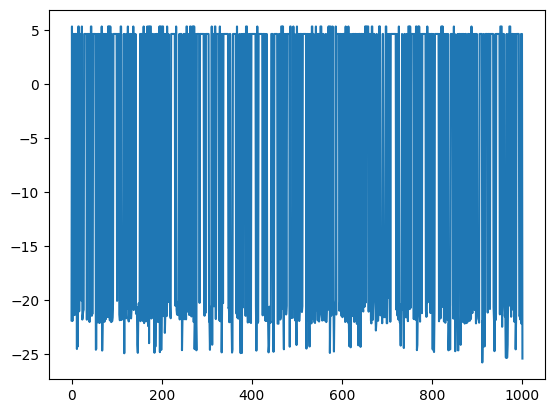

In [46]:
history_cost_x = np.arange(len(history[0]))
plt.plot(history_cost_x, np.log(history[0]))

In [60]:
print(history[1][history[-1][-1]])
print(history[2][history[-1][-1]])
ideal_points = [point['integration_axis'] for point in history[1][history[-1][-1]]]
print(ideal_points)
print(x.integration_axis[ideal_points])
print(history[0][-1])

[{'integration_axis': 2366}, {'integration_axis': 7332}]
[5.025228278005828, 10.590621009091508]
[2366, 7332]
<xarray.DataArray 'integration_axis' (integration_axis: 2)>
array([2.366, 7.332])
Coordinates:
  * integration_axis  (integration_axis) float64 2.366 7.332
9.498965511591196e-12
